In [1]:
import pandas as pd
%matplotlib inline

In [2]:
# Load csv 
url = 'https://raw.githubusercontent.com/kfern/jupyter/next/covid19-es-and/covid19-es-and.csv'
dfCSV = pd.read_csv(url, index_col=['Provincia', 'Fecha'])
dfCSV.loc['Total'][['Ingresados']].tail(3)

,Ingresados
Fecha,
28/03/2020,2106
29/03/2020,2294
30/03/2020,2671


In [23]:
provincia_select = 'Total'
data = dfCSV.loc[provincia_select][['Ingresados']]
data['pctChange'] = data['Ingresados'].pct_change()

In [24]:
print(data[-3:][['pctChange']])
data[-5:]['pctChange'].describe()

            pctChange
Fecha                
28/03/2020   0.142702
29/03/2020   0.089269
30/03/2020   0.164342


count    5.000000
mean     0.132890
std      0.027349
min      0.089269
25%      0.133456
50%      0.134682
75%      0.142702
max      0.164342
Name: pctChange, dtype: float64

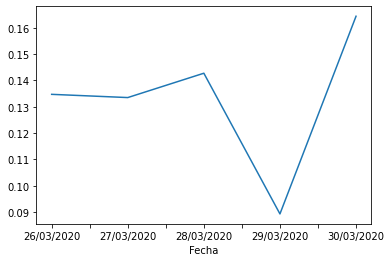

In [25]:
data[-5:]['pctChange'].plot(kind='line')

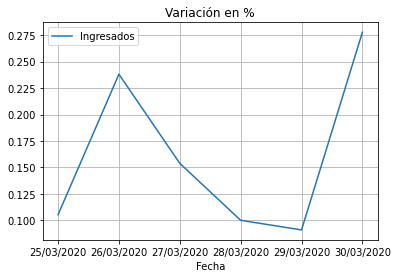

In [29]:
dfCSV.loc['Huelva'][-7:][['Ingresados']].pct_change().plot(kind='line', title='Variación en %', grid=True);